# Customer segmentation using Clustering Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Data Loading and pre-processing

In [2]:
# Load the dataset
customer_data = pd.read_csv('/Users/rohanpadaya/Downloads/Data/Dataset.csv')

#path_for_plots='/Users/rohanpadaya/Downloads/Data/Plots'

In [3]:
# Displaying the first five rows of the dataset

print(customer_data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [4]:
# Column information of dataset

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Checking the mean, median, mode values to better understand our dataset

print(customer_data.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [6]:
# Checking missing values in each column

print(customer_data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
# Replace any infinite values in the dataset with NaN
customer_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
# Impute 'CREDIT_LIMIT' with the median
customer_data['CREDIT_LIMIT'].fillna(customer_data['CREDIT_LIMIT'].median(), inplace=True)

# Impute 'MINIMUM_PAYMENTS' with the median
customer_data['MINIMUM_PAYMENTS'].fillna(customer_data['MINIMUM_PAYMENTS'].median(), inplace=True)


In [9]:
# Checking missing values in each column

print(customer_data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


# Exploratory Data Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

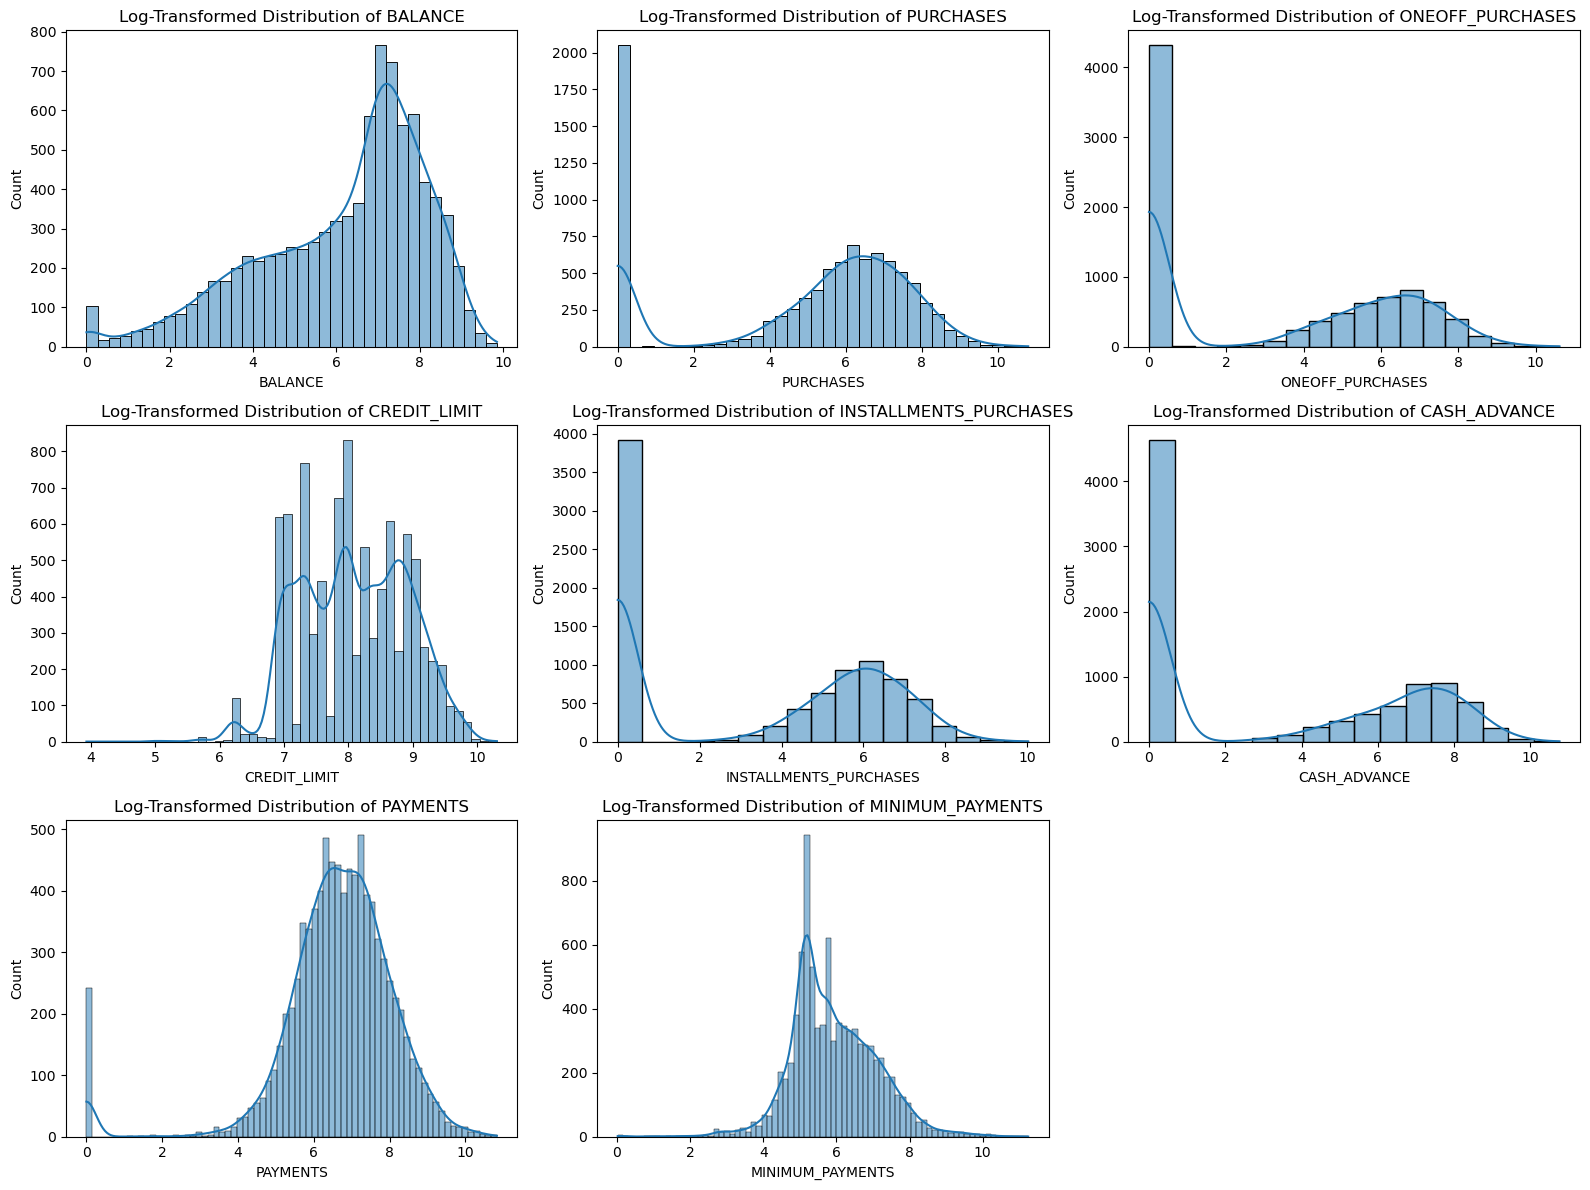

In [10]:

# Columns to log-transform 
columns_to_log_transform = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT', 
                            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Plotting histograms with log transformation
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_log_transform, 1):
    plt.subplot(3, 3, i)
    sns.histplot(np.log1p(customer_data[column]), kde=True)
    plt.title(f'Log-Transformed Distribution of {column}')
plt.tight_layout()
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Log_Transformed_Distributions.png')
plt.show()

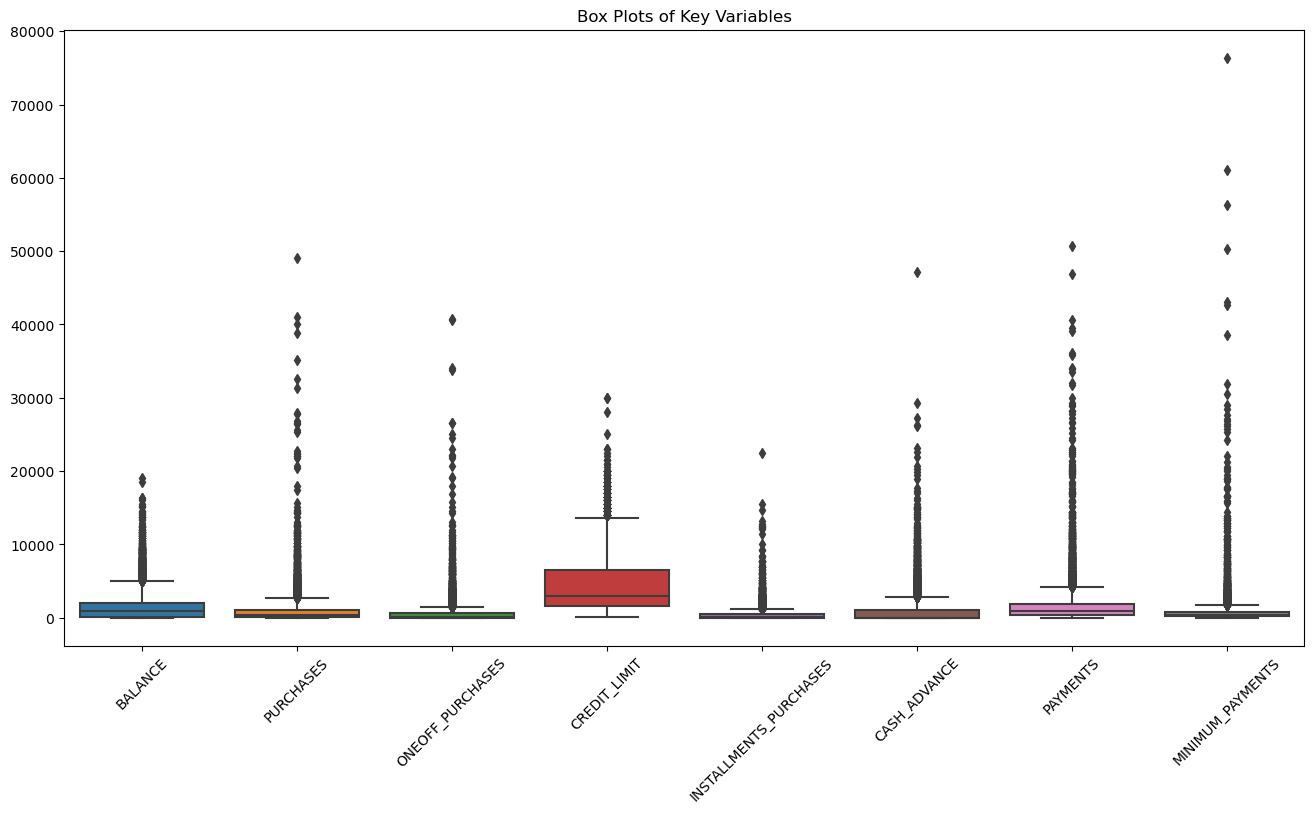

In [11]:
# Using box plots for better visibility of skewed data
plt.figure(figsize=(16, 8))
sns.boxplot(data=customer_data[columns_to_log_transform])
plt.xticks(rotation=45)
plt.title('Box Plots of Key Variables')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Box_Plot.png')

plt.show()

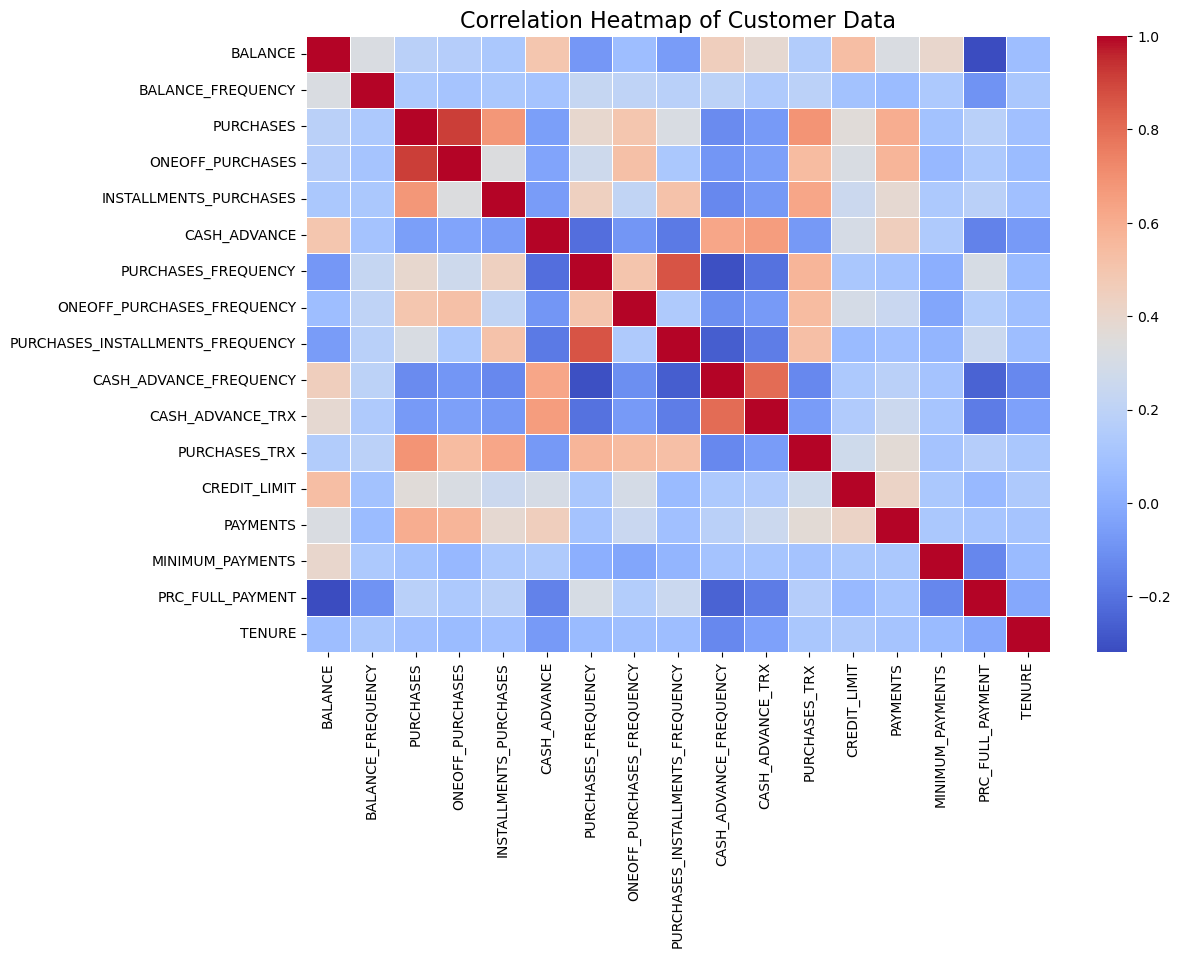

In [12]:

# Exclude the 'CUST_ID' column for correlation calculation
numeric_data = customer_data.drop(columns=['CUST_ID'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix and smaller annotation text
sns.heatmap(correlation_matrix, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Customer Data', fontsize=16)

# Save the correlation heatmap
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Correlation_Heatmap.png')

# Show the plot
plt.show()

In [13]:
numeric_data = customer_data.drop(columns=['CUST_ID'])

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

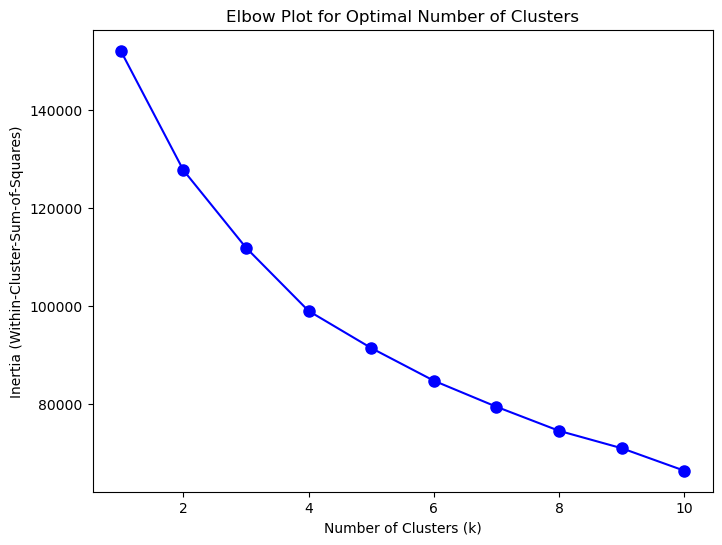

In [14]:
# Calculate the Within-Cluster-Sum-of-Squares (inertia) for different numbers of clusters
inertia = []
K = range(1, 11)  # Test from 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster-Sum-of-Squares)')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Elbow_Plot.png')
plt.show()

# K-means Clustering

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


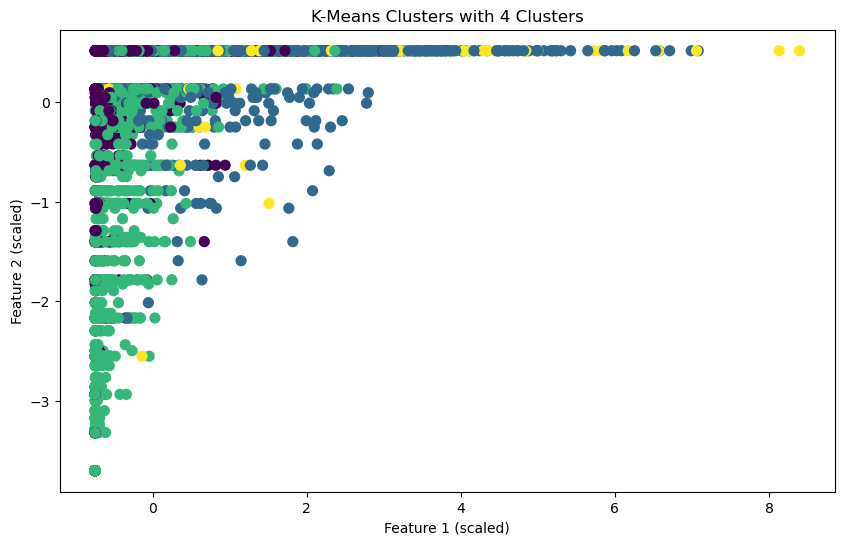

In [15]:
optimal_k = 4  # Set based on the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
customer_data['Cluster'] = kmeans_labels

# Plot the clusters (using two most important features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clusters with {optimal_k} Clusters')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.savefig(f'/Users/rohanpadaya/Downloads/Data/EDA/KMeans_Clusters_{optimal_k}.png')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1976791965228765


# Principal Component Analysis

Explained Variance by Component: [0.27297671 0.2031378 ]


/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/T/ipykernel_81250/465817850.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], pca_data[:, 1], s=50, cmap='viridis')


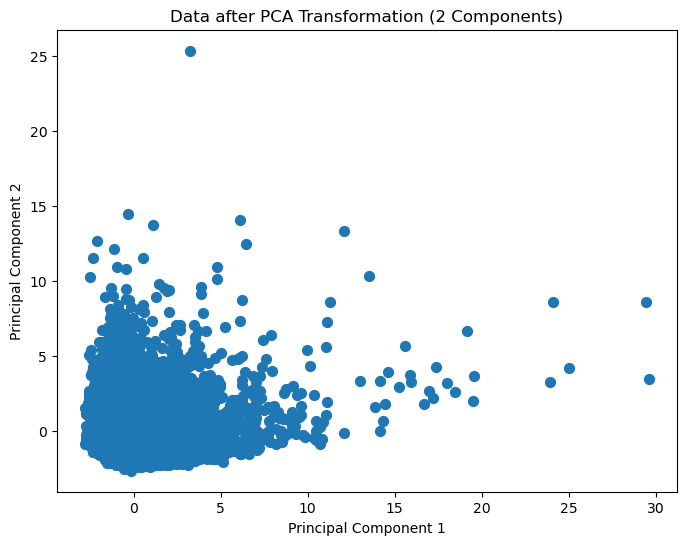

In [17]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the explained variance ratio to understand how much variance is retained
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Component: {explained_variance}')

# Visualize the PCA-transformed data (just for inspection)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=50, cmap='viridis')
plt.title('Data after PCA Transformation (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/PCA_Transformed_Data.png')
plt.show()

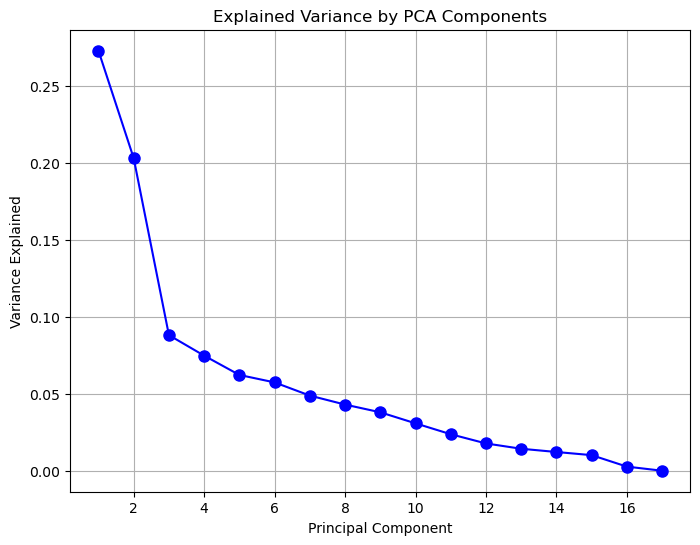

Cumulative Explained Variance: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833 0.94302084 0.96075453
 0.9750331  0.9872023  0.99732897 0.99999931 1.        ]


In [18]:
# Applying PCA to retain all components
pca = PCA()
pca_data_all = pca.fit_transform(scaled_data)

# Explained variance for each component
explained_variance_all = pca.explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_all) + 1), explained_variance_all, 'bo-', markersize=8)
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/PCA_Explained_Variance.png')
plt.show()

# Cumulative variance explained
cumulative_variance = explained_variance_all.cumsum()
print(f'Cumulative Explained Variance: {cumulative_variance}')

In [19]:
# Apply PCA with 10 components
pca = PCA(n_components=10)
pca_data_10 = pca.fit_transform(scaled_data)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


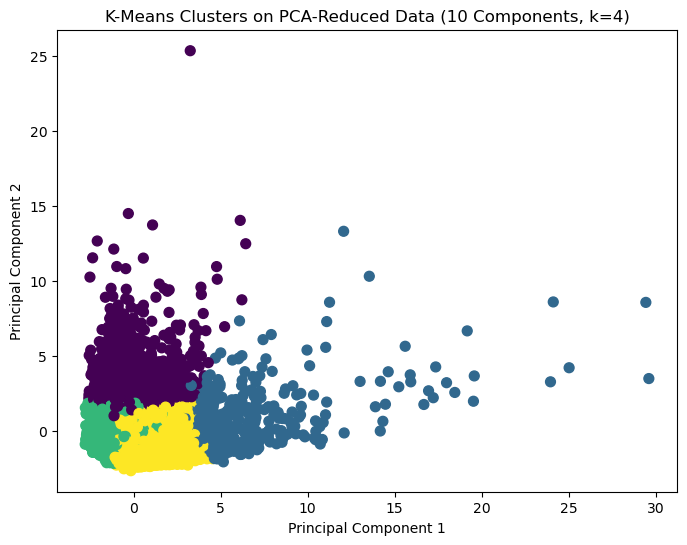

In [20]:
# Reapplying K-Means clustering with 10 components

optimal_k = 4  
kmeans_pca_10 = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels_10 = kmeans_pca_10.fit_predict(pca_data_10)

# Add cluster labels to the PCA-transformed data
customer_data['PCA_10_Cluster'] = kmeans_pca_labels_10

# Visualize the K-Means clusters in the PCA-reduced data (using first two components for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_10[:, 0], pca_data_10[:, 1], c=kmeans_pca_labels_10, cmap='viridis', s=50)
plt.title(f'K-Means Clusters on PCA-Reduced Data (10 Components, k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig(f'/Users/rohanpadaya/Downloads/Data/EDA/KMeans_Clusters_PCA_10_{optimal_k}.png')
plt.show()

In [21]:
# Calculate the Silhouette Score for K-Means after PCA
silhouette_avg_pca_10 = silhouette_score(pca_data_10, kmeans_pca_labels_10)
print(f'Silhouette Score after PCA with 10 components: {silhouette_avg_pca_10}')

Silhouette Score after PCA with 10 components: 0.2169147222273637


# DBSCAN Algorithm

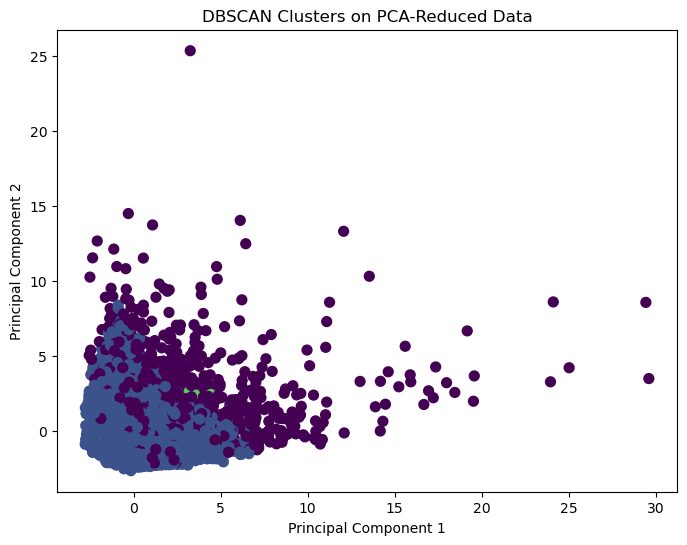

In [22]:
# Apply DBSCAN on PCA-reduced data (10 components)
dbscan = DBSCAN(eps=1.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(pca_data_10)

# Add DBSCAN labels to the data
customer_data['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_10[:, 0], pca_data_10[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clusters on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/DBSCAN_Clusters_PCA_10.png')
plt.show()

In [23]:
# Calculate the silhouette score for DBSCAN (only if more than 1 cluster is found)
if len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(pca_data_10, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan}')
else:
    print('DBSCAN found only one cluster or classified all points as noise.')


Silhouette Score for DBSCAN: 0.18662473918114536


# Tuning DBSCAN algorithm

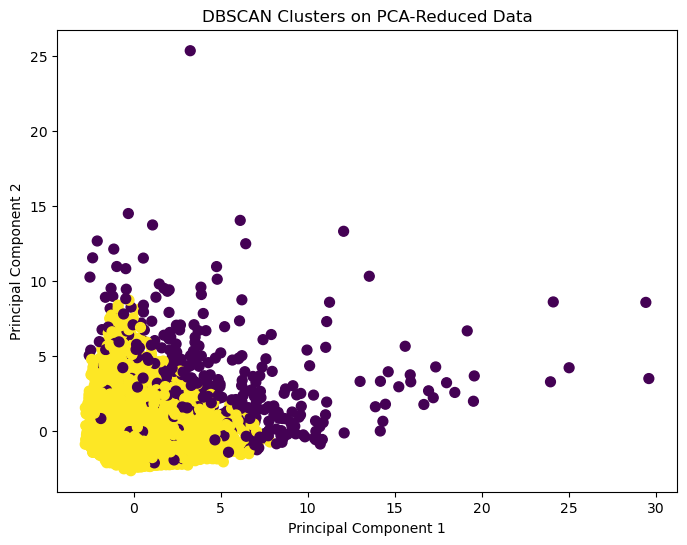

In [24]:
# Apply DBSCAN on PCA-reduced data (10 components)
dbscan = DBSCAN(eps=2.0, min_samples=10)  
dbscan_labels = dbscan.fit_predict(pca_data_10)

# Add DBSCAN labels to the data
customer_data['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_10[:, 0], pca_data_10[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clusters on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/DBSCAN_Clusters_PCA_10.png')
plt.show()

In [25]:
# Calculate the silhouette score for DBSCAN (only if more than 1 cluster is found)
if len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(pca_data_10, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan}')
else:
    print('DBSCAN found only one cluster or classified all points as noise.')


Silhouette Score for DBSCAN: 0.5383521399833967


# Plotting the results based on optimized DBSCAN

In [26]:
numeric_columns = customer_data.select_dtypes(include=[np.number])

# Add the 'DBSCAN_Cluster' column back for grouping
numeric_columns['DBSCAN_Cluster'] = customer_data['DBSCAN_Cluster']

# Group by the DBSCAN cluster and calculate the mean for numeric columns
cluster_profile = numeric_columns.groupby('DBSCAN_Cluster').mean()

# Show the profile (mean values for each feature within each cluster)
print(cluster_profile)

# Save the cluster profile to a CSV file for further analysis
cluster_profile.to_csv('/Users/rohanpadaya/Downloads/Data/EDA/DBSCAN_Cluster_Profiles.csv')


                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
DBSCAN_Cluster                                                                  
-1              4578.783085           0.928687  5630.714818       3644.896223   
 0              1418.649677           0.874783   779.336774        444.766584   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
DBSCAN_Cluster                                                              
-1                         1987.324649   3994.090879             0.723515   
 0                          334.812035    833.001865             0.479071   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
DBSCAN_Cluster                                                                 
-1                                0.464206                          0.563880   
 0                                0.189795                          0.354789   

                CASH_ADVANCE_FREQUENCY  CASH_

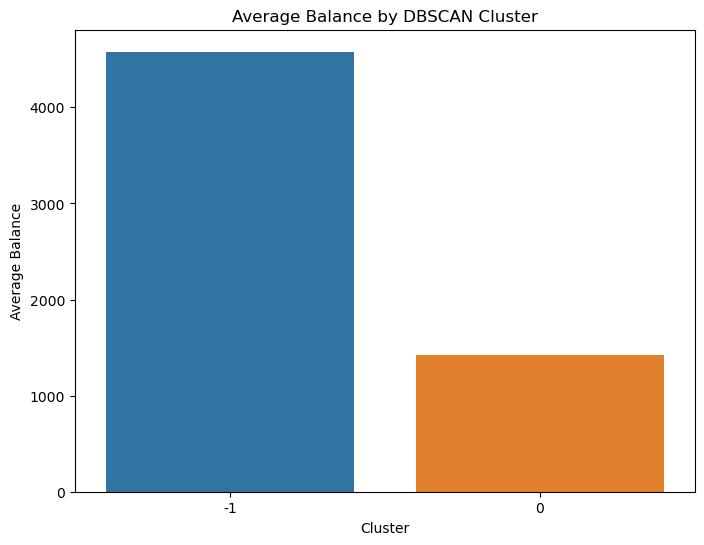

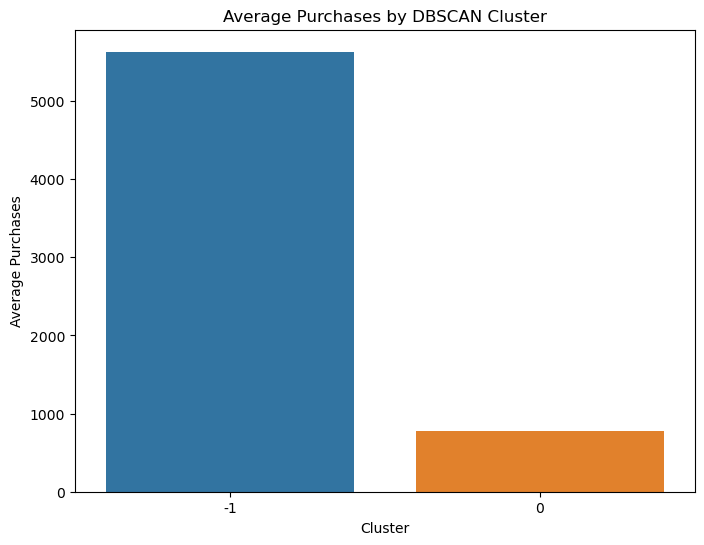

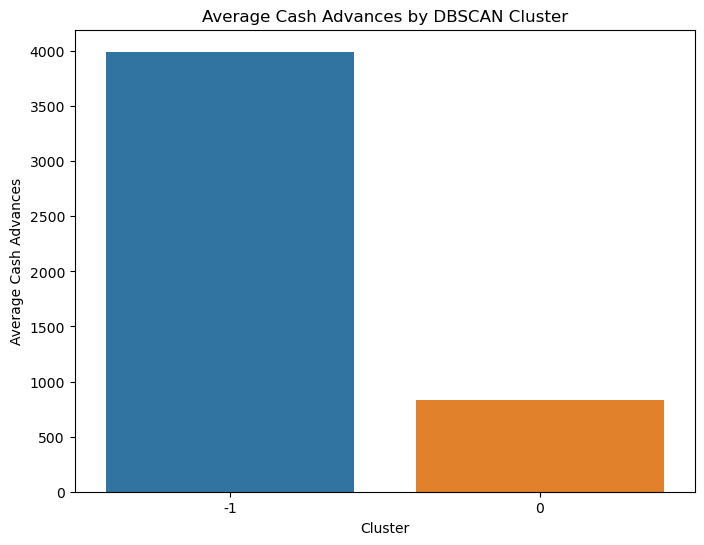

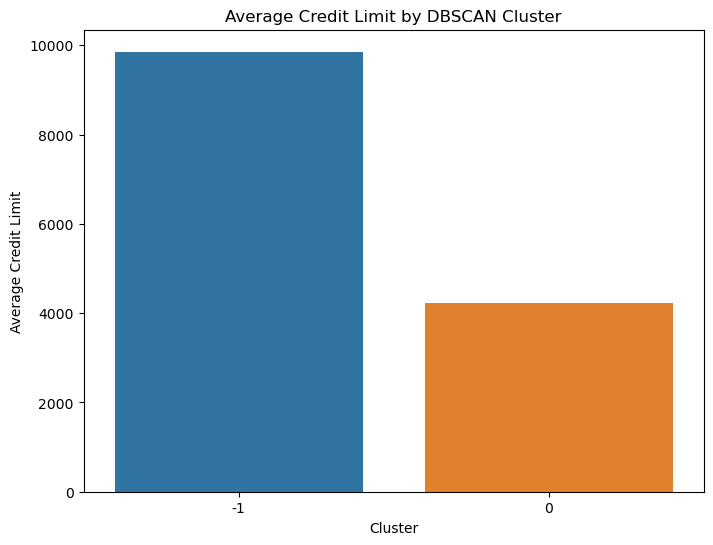

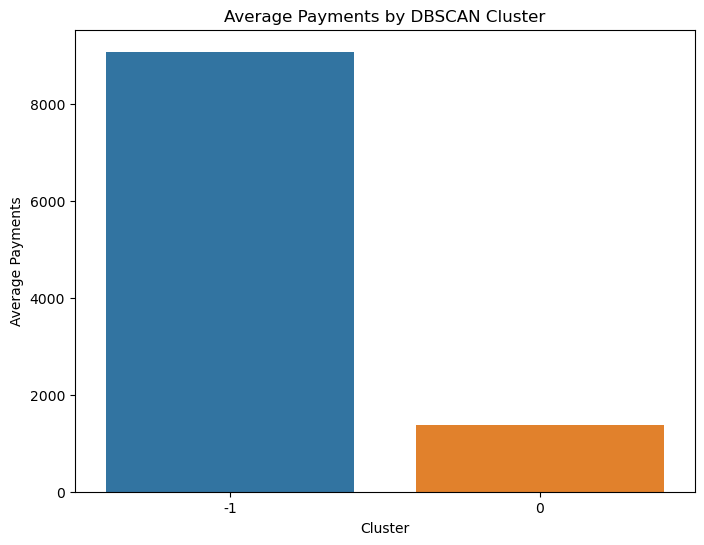

In [27]:

# Example: Visualize the average balance per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_profile.index, y=cluster_profile['BALANCE'])
plt.title('Average Balance by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Balance')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Average_Balance_by_Cluster.png')
plt.show()

# Plot for Average Purchases by Cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_profile.index, y=cluster_profile['PURCHASES'])
plt.title('Average Purchases by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchases')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Average_Purchases_by_Cluster.png')
plt.show()

# Plot for Average Cash Advances by Cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_profile.index, y=cluster_profile['CASH_ADVANCE'])
plt.title('Average Cash Advances by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Cash Advances')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Average_Cash_Advances_by_Cluster.png')
plt.show()

# Plot for Average Credit Limit by Cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_profile.index, y=cluster_profile['CREDIT_LIMIT'])
plt.title('Average Credit Limit by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Credit Limit')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Average_Credit_Limit_by_Cluster.png')
plt.show()

# Plot for Average Payments by Cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_profile.index, y=cluster_profile['PAYMENTS'])
plt.title('Average Payments by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Payments')
plt.savefig('/Users/rohanpadaya/Downloads/Data/EDA/Average_Payments_by_Cluster.png')
plt.show()

# Interpretation of the Cluster Profiles

1. **Cluster -1:**
   - **Balance**: Customers in this group have a much higher average balance (`$4578`), indicating that these customers may carry large balances on their credit cards.
   - **Purchases**: The average total purchases is significantly higher (`$5630`) compared to the other cluster. These customers make larger one-off purchases and have more frequent installment purchases.
   - **Cash Advances**: They tend to rely more heavily on cash advances, with an average cash advance amount of `$3994` and a cash advance frequency of `0.30`. This indicates more frequent usage of cash advance facilities compared to other clusters.
   - **Credit Limit**: Customers in this group have the highest credit limit (`$9854`), which suggests they may be higher-risk customers with high credit utilization.
   - **Payments & Minimum Payments**: These customers make large payments (`$9072`), but also have very high minimum payments due (`$4193`), indicating that they might not be paying off their balances in full.
   - **Tenure**: Slightly lower tenure (`11.23`) than Cluster 0, but not drastically different.


2. **Cluster 0:**
   - **Balance**: The average balance in this cluster is much lower (`$1418`) than in Cluster -1, indicating these customers may carry lower balances on their credit cards.
   - **Purchases**: The average total purchases are significantly lower (`$779`), suggesting that these customers are lower spenders overall. They make fewer one-off and installment purchases.
   - **Cash Advances**: The cash advance usage is much lower (`$833`) compared to Cluster -1, and they tend to take fewer cash advances with a lower frequency.
   - **Credit Limit**: These customers have a lower credit limit (`$4235`), which indicates that they are likely to be less risky customers or have lower overall credit usage.
   - **Payments & Minimum Payments**: Payments are lower (`$1378`) as well as minimum payments (`$682`), indicating they may manage their balances better or simply have lower credit card activity.
   - **Tenure**: Slightly higher tenure (`11.53`), which suggests these customers may have been with the bank for a longer period but are likely more conservative in their spending.

# Key Insights:

- **Cluster -1** represents higher-risk customers with large balances, frequent cash advances, high credit limits, and high minimum payments. These customers are potentially using their credit cards heavily, but may also be struggling to pay off balances.
- **Cluster 0** represents lower-risk customers with lower balances, lower spending, and lower credit limits. These customers seem to have a more conservative approach to credit card usage, with better balance management.


# Potential Marketing/Business Strategies:

### For Cluster -1 (High Risk Customers):

- **Debt Assistance**: Offer programs to help reduce their debt or transfer their balance to a lower-interest plan. This will make it easier for them to pay down what they owe.
- **Lower Interest Rates**: Consider giving these customers a lower interest rate to reduce their overall financial burden, especially for cash advances.
- **Credit Line Increase on Spending Milestones**: Offer a conditional credit line increase to customers who meet specific spending milestones within a certain time frame (e.g., spend `$1000` within the next three months to get a `$500` credit line increase). This encourages increased spending and card usage while giving the bank an opportunity to earn additional revenue through transaction fees and interest.
- **Financial Guidance**: Provide advice or tools to help them use their credit cards more responsibly and avoid accumulating too much debt.


### For Cluster 0 (Low Risk Customers):

- **Reward Programs**: Encourage these customers to use their credit cards more often by offering rewards, like cashback or points.
- **Safe Credit Offers**: Provide special low-risk credit options or bonuses based on spending to keep them loyal without increasing their debt.
- **Exclusive Perks**: Give them extra benefits to reward their loyalty, especially if they have been good, long-term customers.